# Exploration data analysis (EDA)

In [128]:
# Load data
import json
with open('../data/raw/Jan2020Frontiers.jsonl', 'r') as json_file:
    json_list = list(json_file)

list_of_papers = []
    
for json_str in json_list:
    result = json.loads(json_str)
    list_of_papers.append(result)

In [129]:
import pandas as pd
df = pd.DataFrame.from_dict(list_of_papers)

In [130]:
df.sort_values(by="journal", ascending=False)

,id,text,journal
379,493646,\n Longitudinal Characterization of Coccidiosi...,Frontiers in Veterinary Science
138,492485,\n Use of Slow-Release Injectable Moxidectin f...,Frontiers in Veterinary Science
2500,509440,\n Evaluation of Yeast Fermented Poultry By-Pr...,Frontiers in Veterinary Science
474,511274,"\n In-vivo Intramuscular Collagen Synthesis, ...",Frontiers in Veterinary Science
2405,501066,\n Risk Factors of Anesthesia-Related Mortalit...,Frontiers in Veterinary Science
...,...,...,...
1266,495739,\n \n Meet Neo: Your Distant Cousin? \n \n \n ...,Frontiers for Young Minds
254,469380,\n \n \n What Are Model Microorganisms? \n \n ...,Frontiers for Young Minds
1792,461075,\n \n Computing the Climate: Building a Model ...,Frontiers for Young Minds
1782,492340,\n \n \n Why Vaccines Do Not Work Without Trus...,Frontiers for Young Minds


In [132]:
import re
def find_keywords(s):
    start = "Keywords:"
    end = "Citation:"
    s = s.replace(" :",":")
    keywords_list = s[s.find(start)+len(start):s.rfind(end)].replace("\n"," ").replace(":","").split(",")
    keywords_list = [keyword.strip() for keyword in keywords_list ]
    return keywords_list

In [133]:
list_of_all_keywords = []
for i, row in df.iterrows():
    list_of_all_keywords.append(find_keywords(row["text"]))
df["keywords"] = list_of_all_keywords
df["keywords_len"] = df["keywords"].apply(lambda x: len(x))

In [136]:
def preprocess(text):
    word_to_remove = ["google", "scholar","pub","1","2","3","4","5","6","7","8","9"]
    stop = set(stopwords.words('english') + list(string.punctuation))
    preprocessed_text = " ".join([i for i in word_tokenize(text.lower()) if (i not in stop) and (len(i) > 3) and (i not in word_to_remove)])
    return preprocessed_text

In [137]:
df["proprocessed_text"] = df["text"].apply(preprocess)

In [138]:
df.shape

(2528, 6)

In [139]:
df.head(5)

,id,text,journal,keywords,keywords_len,proprocessed_text
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine,"[inflammatory bowel disease, arthritis, sleep ...",5,sleep characteristics influencing factors slee...
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics,"[type 2 diabetes mellitus, machine learning, h...",6,hybrid approach modeling type diabetes mellitu...
2,482500,\n Relationship Between SES and Academic Achie...,Frontiers in Psychology,"[socioeconomic status, self-concept, school ac...",5,relationship academic achievement junior high ...
3,437333,Environmental Health Research in Africa: Impor...,Frontiers in Genetics,"[G x E, Africa, environmental, pesticides, met...",7,environmental health research africa important...
4,486515,"\n 3,5-T2—A Janus-Faced Thyroid Hormone Metabo...",Frontiers in Endocrinology,"[thyroid hormone, 3, 5-diiodothyronine, hypoth...",9,"3,5-t2—a janus-faced thyroid hormone metabolit..."


In [140]:
df.sort_values(by="keywords_len", ascending=False)

,id,text,journal,keywords,keywords_len,proprocessed_text
1116,486107,\n \n \n Do Not Swat the Wasp! \n \n \n \n \n ...,Frontiers for Young Minds,[Not Swat the Wasp! Abstract You p...,189,swat wasp abstract probably like bees cute fur...
1044,480838,"\n \n \n Drought, Floods, Climate Change, and ...",Frontiers for Young Minds,"[ought, Floods, Climate Change, and Forest Los...",188,drought floods climate change forest loss amaz...
1482,490548,\n \n From Ouch to Ah-ha! Understanding Wounds...,Frontiers for Young Minds,"[Ouch to Ah-ha! Understanding Wounds, Healing,...",181,ouch ah-ha understanding wounds healing infect...
1123,485296,\n \n \n Blood Vessels Under the Microscope \n...,Frontiers for Young Minds,[ood Vessels Under the Microscope Ab...,179,blood vessels microscope abstract paper looks ...
1266,495739,\n \n Meet Neo: Your Distant Cousin? \n \n \n ...,Frontiers for Young Minds,[Neo Your Distant Cousin? Abstract ...,159,meet distant cousin abstract ever wondered ext...
...,...,...,...,...,...,...
1081,486292,"\n Metabolic Syndrome, and Particularly the Hy...",Frontiers in Endocrinology,"[breast cancer, metabolic syndrome, hypertrigl...",5,metabolic syndrome particularly hypertriglycer...
1080,496512,\n Prognosis and Risk Factors of Radiation-Ind...,Frontiers in Oncology,"[radiation-induced lymphopenia, stereotactic b...",5,prognosis risk factors radiation-induced lymph...
1079,503594,\n Saikosaponin A Inhibits Triple-Negative Bre...,Frontiers in Oncology,"[saikosaponin A, natural product, triple-negat...",5,saikosaponin inhibits triple-negative breast c...
1078,478403,\n Brain Gray Matter Volume Associations With ...,Frontiers in Aging Neuroscience,"[MRI, aged, brain, motricity, EPI-epidemiology]",5,brain gray matter volume associations abnormal...


<AxesSubplot:>

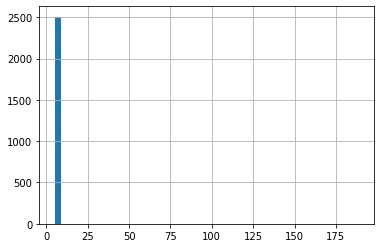

In [142]:
df["keywords_len"].hist(bins=50)

In [144]:
import matplotlib.pyplot as plt
df[df["keywords_len"] >8].shape

(21, 6)

In [145]:
df_remove_keywords_unknown = df[df["keywords_len"] <=8]

In [146]:
df_remove_keywords_unknown.head()

,id,text,journal,keywords,keywords_len,proprocessed_text
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine,"[inflammatory bowel disease, arthritis, sleep ...",5,sleep characteristics influencing factors slee...
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics,"[type 2 diabetes mellitus, machine learning, h...",6,hybrid approach modeling type diabetes mellitu...
2,482500,\n Relationship Between SES and Academic Achie...,Frontiers in Psychology,"[socioeconomic status, self-concept, school ac...",5,relationship academic achievement junior high ...
3,437333,Environmental Health Research in Africa: Impor...,Frontiers in Genetics,"[G x E, Africa, environmental, pesticides, met...",7,environmental health research africa important...
5,463298,\n Managing Oil Palm Plantations More Sustaina...,Frontiers in Forests and Global Change,"[biodiversity, habitat heterogeneity, palm oil...",8,managing palm plantations sustainably large-sc...


<AxesSubplot:xlabel='journal'>

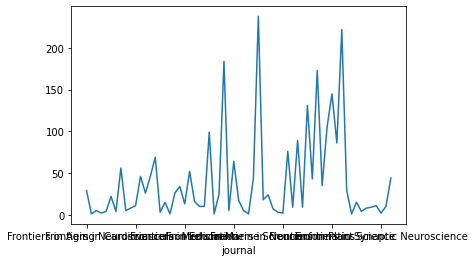

In [148]:
df_remove_keywords_unknown.groupby(["journal"]).size().plot()

In [11]:
from sentence_transformers import SentenceTransformer


sentences = [df["text"][0]]

model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')
embeddings = model.encode(sentences)


In [12]:
embeddings

array([[-4.34988946e-01,  8.24405968e-01,  2.47655675e-01,
        -4.72737610e-01,  6.67110741e-01, -5.89472093e-02,
         4.44832087e-01, -3.27395737e-01,  2.06932306e-01,
        -8.70081365e-01, -4.02162284e-01,  3.00427407e-01,
         9.73128796e-01,  5.63259602e-01, -5.91041982e-01,
         5.92413545e-01, -2.64529381e-02,  1.43713176e-01,
        -1.58739775e-01, -2.64645457e-01, -2.06478253e-01,
        -2.86111712e-01,  1.17042750e-01,  1.12030649e+00,
         5.27035654e-01,  1.06935227e+00, -6.01438701e-01,
         5.19289672e-01, -6.27637386e-01, -2.87059426e-01,
        -3.14248423e-03,  2.66370270e-02, -1.29437009e-02,
        -8.40113640e-01,  6.23296618e-01,  6.47993326e-01,
        -5.04028141e-01,  1.76729113e-01,  1.67715997e-01,
        -2.53443509e-01, -6.43000245e-01, -5.82649291e-01,
         2.23008782e-01,  5.98040164e-01, -7.70253658e-01,
        -4.49304074e-01, -1.90851286e-01,  5.66382408e-01,
         2.26814091e-01, -2.77289361e-01,  6.77231371e-0

In [ ]:
allenai/scibert_scivocab_uncased

In [ ]:
from flair.data import Sentence
from flair.embeddings import BertEmbeddings

# TF-IDF (whole document)

# SPACY word2vec (keywords)
https://spacy.io/usage/linguistic-features/#vectors-similarity

In [24]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [31]:
key1 = nlp("microbiology")
key2 = nlp("biology")

In [28]:
key1.similarity(key2)

0.7490798450975483

# SPACY word2vec (whole document)

In [ ]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [34]:
doc1 = nlp(df["text"][379])
doc2 = nlp(df["text"][138])
doc3 = nlp(df["text"][1207])

In [33]:
doc1.similarity(doc2)

0.9739975989700037

In [35]:
doc1.similarity(doc3)

0.8944915184773169

In [37]:
doc2.similarity(doc3)

0.9136686877940435

In [106]:
print(doc1.ents)

(Alyson E. Gautier, Juan D. Latorre, Phil L. Matsler, University of Arkansas, Fayetteville, AR, United States, 3, NC, VAC, Cobb, BWG, 12, 16, 20, 28, 36, 10, 12, 16, 20, 36, IDE, 12, 20, 36, VAC, 0.05, 20, 0.05, VAC, NC, FCR, 28, 36, FCR, 0.05, VAC, NC, VAC, IDE, 0.05, VAC, VAC, VAC, IDE, VAC, 20 or, 36, VAC, IDE, 20, the United States, 1, 2, 3, 3, 4, 5, 5, 8, Adedokun et al., fed, 7, 11, the first 3 weeks, One thousand, five-hundred, Cobb, 500, 120, 14, 0.07 m, 2, 30, first, 12, 12, 0.08 m, 2, 90, 36, 0–14, 15–28, 29–36, 13, 1, 1, 1, 0 to, 36, one-third, 500, Merck Animal Health, Intervet Inc., Millsboro, DE, USA, 0.25 mL, three, 1, NC, 2, Clinacox, Huvepharma, 3, VAC, 10, 0, 12, 16, 20, 28, 36, BWG, FCR, FCR, OPG, 12, 16, 20, 28, 36, 3, 4, 1 week, 1 ml, 9 ml, McMaster, 10, 0.15 ml, Blood, 10, 12, 16, 20, 36, half, Digesta, 12, 16, 36, 2, 15 min, 1,300 ×, Mettler-Toledo, UK, Meckel, PBS, 10%, 14, 934.02, Parr 6200, Parr Instruments Co., Moline, IL., CE Elantech, Lakewood, NJ, EDTA, 99

# Sentence BERT

In [51]:
from keybert import KeyBERT
kw_model = KeyBERT(model='all-mpnet-base-v2')


In [52]:
df.head(2)

,id,text,journal,keywords,keywords_len
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine,"[inflammatory bowel disease, arthritis, sleep ...",5
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics,"[type 2 diabetes mellitus, machine learning, h...",6


In [77]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

index = 3
sent = df["text"][index]
print(df["journal"][index])
stop = set(stopwords.words('english') + list(string.punctuation))
preprocessed_text = " ".join([i for i in word_tokenize(sent.lower()) if (i not in stop) and (len(i) > 3)])

Frontiers in Genetics


[nltk_data] Downloading package punkt to /home/operti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/operti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
df = df[:20]
def preprocess(text):
    stop = set(stopwords.words('english') + list(string.punctuation))
    preprocessed_text = " ".join([i for i in word_tokenize(text.lower()) if (i not in stop) and (len(i) > 3)])
    return preprocessed_text
df["preprocessed_text"] = df["text"].apply(preprocess)

In [101]:
df["preprocessed_text"]

0     sleep characteristics influencing factors slee...
1     hybrid approach modeling type diabetes mellitu...
2     relationship academic achievement junior high ...
3     environmental health research africa important...
4     3,5-t2—a janus-faced thyroid hormone metabolit...
5     managing palm plantations sustainably large-sc...
6     differential regulation lps-mediated ve-cadher...
7     association stage serum levels determining sur...
8     alcohol-specific computerized interventions al...
9     systematic scoping review resilience intervent...
10    vitro antioxidant anti-inflammatory skin perme...
11    fake till make contaminating rubber hands mult...
12    genetics non-alcoholic fatty liver cardiovascu...
13    xuebijing injection maintains grp78 expression...
14    components predictors biological soil crusts v...
15    one-step synthesis p-codoped carbon nanosheets...
16    assessment exercise stroke volume prediction o...
17    navigating complexities agent-based modeli

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_df=0.85,max_features=10000)
word_count_vector=cv.fit_transform(df["preprocessed_text"].to_list())

In [89]:
word_count_vector

<20x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 27838 stored elements in Compressed Sparse Row format>

In [90]:
list(cv.vocabulary_.keys())[:10]


['sleep',
 'characteristics',
 'influencing',
 'factors',
 'quality',
 'patients',
 'inflammatory',
 'bowel',
 'disease',
 'peripheral']

In [91]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [98]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [100]:
feature_names=cv.get_feature_names()
doc=df["preprocessed_text"][0]
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
sorted_items=sort_coo(tf_idf_vector.tocoo())
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
keywords

{'sleep': 0.767,
 'ibd': 0.287,
 'patients': 0.286,
 'pa': 0.275,
 'bowel': 0.145,
 'disease': 0.133,
 'group': 0.118,
 'psqi': 0.113,
 'quality': 0.105,
 'inflammatory': 0.092}

In [125]:
index = 5
df["journal"][index]

'Frontiers in Forests and Global Change'

In [135]:
from summa import keywords
TR_keywords = keywords.keywords(preprocessed_text, scores=True)
print(TR_keywords[0:20])

[('exposures', 0.266459677310982), ('google scholar', 0.22095053333156467), ('associated', 0.20335826651772923), ('associations', 0.20335826651772923), ('associate', 0.20335826651772923), ('study', 0.18965505526213502), ('studied', 0.18965505526213502), ('risk', 0.13019722238480208), ('risks', 0.13019722238480208), ('observed association', 0.11805318318045614), ('effects', 0.11423542985869288), ('effect', 0.11423542985869288), ('effective', 0.11423542985869288), ('effectiveness', 0.11423542985869288), ('children', 0.1126370084653243), ('environmental health research africa important', 0.10863603303417665), ('queried pubmed', 0.10390480586262892), ('high levels', 0.10222986247323514), ('exposure categories listed', 0.09915865451513423), ('publications studies evaluating', 0.09634407753072521)]


In [104]:
keywords = kw_model.extract_keywords(preprocessed_text, 

                                     keyphrase_ngram_range=(1, 4), 

                                     stop_words='english', 

                                     highlight=False,

                                     top_n=3)

keywords_list= list(dict(keywords).keys())

KeyboardInterrupt: 

In [103]:
keywords_list

['hazardous exposures increasing africa',
 'pollution exposures unique africa',
 'environmental health research africa']

# Yake

In [109]:
import yake

In [111]:
df["text"][0]

"\n Sleep Characteristics and Influencing Factors of Sleep Quality in Patients With Inflammatory Bowel Disease-Peripheral Arthritis \n \n Yin Zhang 1 † ,  Bin Pi 2 † ‡ ,  Xianlin Xu 1 ,  Ying Li 3 ,  Xiangfan Chen 3 ,  Ningxi Yang 4 *  and  Xiaoyan Li 3 \n \n 1 Department of Gastroenterology, Huiyang Sanhe Hospital, Huizhou, China \n 2 Department of Orthopedics, Fifth Affiliated Hospital, Guangzhou Medical University, Guangzhou, China \n 3 School of Health Science, Wuhan University, Wuhan, China \n 4 College of Humanities and Social Sciences, Harbin Engineering University, Harbin, China \n \n Background:  Patients with inflammatory bowel disease-peripheral arthritis (IBD-PA) often accompany by sleep problems, but few studies have used polysomnography to investigate the objective sleep characteristics of IBD-PA. \n Methods:  Patients in IBD-PA group, inflammatory bowel disease (IBD) group, healthy control (HC) group were examined by polysomnography (PSG) and the sleep characteristics we

In [114]:
kw_extractor = yake.KeywordExtractor()
text = df["preprocessed_text"][0]
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 3
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
for kw in keywords:
    print(kw)

('group ibd-pa group', 9.829244569556466e-05)
('sleep quality patients', 0.00018907973825403636)
('full text google', 0.00019621737317750167)
